Завдання:

1. Встановлення TensorFlow:
Встановіть TensorFlow на вашому комп'ютері або віртуальному середовищі.

2. Ознайомлення з TensorFlow:
Вивчіть основні концепції TensorFlow, такі як тензори, операції та графи обчислень.
Створіть тензори різних типів та виконайте над ними операції.

3. Побудова моделі для регресії:
використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.
Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 2.

         Date   Open   High    Low  Close  Volume Currency
0  2000-01-04  289.5  289.5  280.0  283.7   21621      USD
1  2000-01-05  283.7  285.0  281.0  282.1   25448      USD
2  2000-01-06  281.6  282.8  280.2  282.4   19055      USD
3  2000-01-07  282.5  284.5  282.0  282.9   11266      USD
4  2000-01-10  282.4  283.9  281.8  282.7   30603      USD
Epoch 1/50
143/143 [==============================] - 1s 2ms/step - loss: 1352237.3750 - val_loss: 1315044.8750
Epoch 2/50
143/143 [==============================] - 0s 2ms/step - loss: 1332125.3750 - val_loss: 1285678.6250
Epoch 3/50
143/143 [==============================] - 0s 2ms/step - loss: 1292601.2500 - val_loss: 1236526.2500
Epoch 4/50
143/143 [==============================] - 0s 2ms/step - loss: 1234352.8750 - val_loss: 1169791.0000
Epoch 5/50
143/143 [==============================] - 0s 2ms/step - loss: 1158510.5000 - val_loss: 1086468.5000
Epoch 6/50
143/143 [==============================] - 0s 1ms/step - loss: 1068248.5000

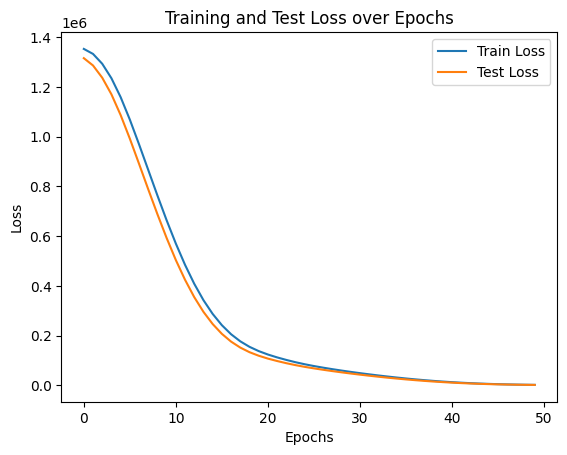

In [16]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Завантаження даних з файлу gold.csv
data = pd.read_csv('gold.csv')

# Виведення перших кількох рядків набору даних для перевірки
print(data.head())

# Визначення ознак та цільової змінної
features = data.drop(['Date', 'Close', 'Currency'], axis=1)
target = data['Close']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення моделі нейронної мережі
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='linear'))

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі
history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=32, validation_data=(X_test_scaled, y_test))

# Оцінка результатів навчання
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Графічне відображення результатів навчання
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4. Побудова моделі для класифікації:
використайте згенерований у ллабораторній роботіаб 3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 3.

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.8067 - val_loss: 0.4174 - val_accuracy: 0.8201
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8285 - val_loss: 0.4159 - val_accuracy: 0.8182
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8316 - val_loss: 0.4109 - val_accuracy: 0.8270
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8382 - val_loss: 0.4044 - val_accuracy: 0.8251
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8393 - val_loss: 0.4075 - val_accuracy: 0.8270
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8384 - val_loss: 0.4030 - val_accuracy: 0.8376
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8407 - val_loss: 0.4028 - val_accuracy: 0.8276
Epoch 

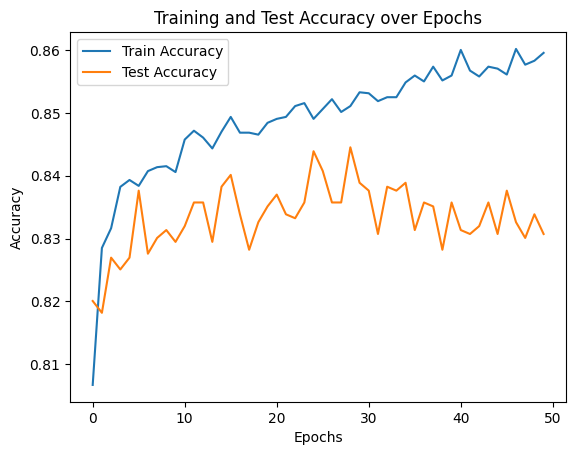

In [18]:
# Імпорт необхідних бібліотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Завантаження даних з файлу salaries.csv
data = pd.read_csv('salaries.csv')

# Визначення ознак та міток класів
features = data.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)
# бінарна класифікація: зарплати більше 100000 USD
target = data['salary_in_usd'] > 100000

# Кодування категоріальних ознак
label_encoder = LabelEncoder()
for column in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    features[column] = label_encoder.fit_transform(features[column])

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення моделі нейронної мережі для класифікації
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))   
model.add(Dense(1, activation='sigmoid'))

# Компіляція моделі для бінарної класифікації
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=32, validation_data=(X_test_scaled, y_test))

# Оцінка результатів навчання
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
print(train_accuracy)
print(test_accuracy)
# Графічне відображення результатів навчання

plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()